In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [4]:
datafile = "/Volumes/win/sj/dataset/air_data.csv"
data = pd.read_csv(datafile, encoding="utf-8")
print(data.shape)
print(data.info())


(62988, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59743 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64


In [5]:
print(data[["SUM_YR_1","SUM_YR_2"]])
# print(data['SUM_YR_1'].notnull())
data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]

       SUM_YR_1  SUM_YR_2
0      239560.0  234188.0
1      171483.0  167434.0
2      163618.0  164982.0
3      116350.0  125500.0
4      124560.0  130702.0
5      112364.0   76946.0
6      120500.0  114469.0
7       82440.0  114971.0
8       72596.0   87401.0
9       85258.0   60267.0
10      69056.0   91581.0
11      92975.0  126821.0
12      44750.0   53977.0
13     105466.0  119832.0
14      68941.0   79076.0
15      69300.0   54764.0
16      93840.0   93114.0
17      66239.0   63260.0
18      99735.0   93006.0
19      60930.0   52316.0
20      69566.0  122763.0
21      46800.0  198224.0
22      59169.0   74497.0
23      64258.0   59600.0
24      38510.0   75816.0
25      72806.0   83496.0
26     136769.0   96568.0
27     101398.0   83139.0
28      94055.0  107896.0
29      83780.0  102594.0
...         ...       ...
62958     570.0     460.0
62959       0.0     383.0
62960       0.0     277.0
62961     830.0       0.0
62962     838.0       0.0
62963       0.0    1000.0
62964     83

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/06/07,2011/07/01,男,5,DRANCY,NaN,FR,50.0,2014/03/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


In [6]:
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
index1 = data["SUM_YR_1"] != 0
index2 = data["SUM_YR_2"] != 0
index3 = (data["SEG_KM_SUM"] == 0) & (data["avg_discount"] == 0)
data = data[index1 | index2| index3]
print(data.shape)


(62044, 44)


In [7]:
filter_data = data[[ "FFP_DATE", "LOAD_TIME", "FLIGHT_COUNT", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "AVG_INTERVAL" , "MAX_INTERVAL", "avg_discount"]]
filter_data[0:5]
# filter_data['SUM_YR_1']

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2006/11/02,2014/03/31,210,239560.0,234188.0,580717,3.483254,18,0.961639
1,2007/02/19,2014/03/31,140,171483.0,167434.0,293678,5.194245,17,1.252314
2,2007/02/01,2014/03/31,135,163618.0,164982.0,283712,5.298507,18,1.254676
3,2008/08/22,2014/03/31,23,116350.0,125500.0,281336,27.863636,73,1.090870
4,2009/04/10,2014/03/31,152,124560.0,130702.0,309928,4.788079,47,0.970658


In [8]:
data["LOAD_TIME"] = pd.to_datetime(data["LOAD_TIME"])
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
data["入会时间"] = data["LOAD_TIME"] - data["FFP_DATE"]
data["平均每公里票价"] = (data["SUM_YR_1"] + data["SUM_YR_2"]) / data["SEG_KM_SUM"]
data["时间间隔差值"] = data["MAX_INTERVAL"] - data["AVG_INTERVAL"]
deal_data = data.rename(
    columns = {"FLIGHT_COUNT" : "飞行次数", "SEG_KM_SUM" : "总里程", "avg_discount" : "平均折扣率"},
    inplace = False
)
filter_data = deal_data[["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]]
print(filter_data[0:5])
filter_data['入会时间'] = filter_data['入会时间'].astype(np.int64)/(60*60*24*10**9)
print(filter_data[0:5])
print(filter_data.info())

# print(data["FFP_DATE"] )

       入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0 2706 days   210  0.815798  580717  14.516746  0.961639
1 2597 days   140  1.154043  293678  11.805755  1.252314
2 2615 days   135  1.158217  283712  12.701493  1.254676
3 2047 days    23  0.859648  281336  45.136364  1.090870
4 1816 days   152  0.823617  309928  42.211921  0.970658
     入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0  2706.0   210  0.815798  580717  14.516746  0.961639
1  2597.0   140  1.154043  293678  11.805755  1.252314
2  2615.0   135  1.158217  283712  12.701493  1.254676
3  2047.0    23  0.859648  281336  45.136364  1.090870
4  1816.0   152  0.823617  309928  42.211921  0.970658
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 62978
Data columns (total 6 columns):
入会时间       62044 non-null float64
飞行次数       62044 non-null int64
平均每公里票价    62044 non-null float64
总里程        62044 non-null int64
时间间隔差值     62044 non-null float64
平均折扣率      62044 non-null float64
dtypes: float64(4), 

/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [9]:
filter_zscore_data = (filter_data - filter_data.mean(axis=0))/(filter_data.std(axis=0))
filter_zscore_data[0:5]



,入会时间,飞行次数,平均每公里票价,总里程,时间间隔差值,平均折扣率
0,1.435707,14.034016,0.605115,26.761154,-0.987974,1.295540
1,1.307152,9.073213,1.812903,13.126864,-1.019566,2.868176
2,1.328381,8.718869,1.827807,12.653481,-1.009128,2.880950
3,0.658476,0.781585,0.761692,12.540622,-0.631155,1.994714
4,0.386032,9.923636,0.633034,13.898736,-0.665235,1.344335


In [10]:
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
#     print(data_train)
    data_train = data_train.values
#     print(data_train)
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
#         print("1.ceter_list:",cluster_ceter_list)
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
#         print("2.cluster_list:",len(cluster_list),cluster_list[-20:])
        for index in  range(len(data)):#计算残差平方和
            cluster_num = cluster_list[index]
            
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
#         print("3.dt_index:",data_train[index, :])
#         print("4.c_c_l:",cluster_ceter_list[cluster_num])
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(filter_zscore_data)


簇数是 2 时； SSE是 296587.743902
簇数是 3 时； SSE是 245317.411761
簇数是 4 时； SSE是 209300.013678
簇数是 5 时； SSE是 183886.051282
簇数是 6 时； SSE是 167465.481388
簇数是 7 时； SSE是 151869.190019
簇数是 8 时； SSE是 142922.558948
簇数是 9 时； SSE是 135003.747164


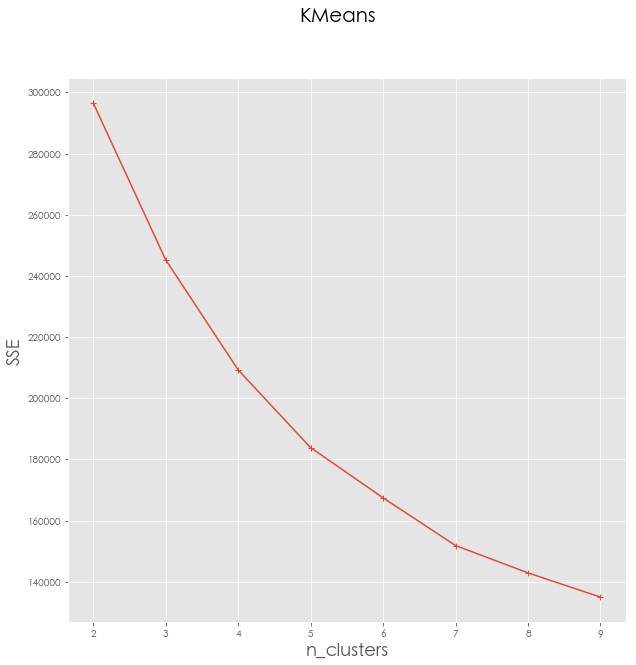

In [11]:
#画图，通过观察SSE与k的取值尝试找出合适的k值
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'STHeiti'#mac字体替换
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()


0 [ -7.32799855e-01  -3.25978383e-01  -4.11292902e-01  -2.89809591e-01
  -4.78640606e-01  -4.65262949e-01   2.21880000e+04] #
1 [ -1.89926520e-01  -2.78133782e-01   1.51704430e+00  -3.61808769e-01
  -3.34079346e-01   1.44218473e+00   8.72400000e+03] #
2 [  1.17399566e+00  -1.04176941e-01  -2.04740434e-01  -1.04501131e-01
  -1.43304193e-01  -1.74910445e-01   1.47320000e+04] #
3 [ -1.67510536e-01  -2.00601713e-01  -1.66320293e-01  -1.71852299e-01
   1.58146143e+00  -1.23496640e-01   1.09570000e+04] #
4 [  4.52118801e-01   2.46102225e+00   1.31166373e-01   2.39085046e+00
  -3.08664187e-01   3.04367784e-01   5.44300000e+03] #


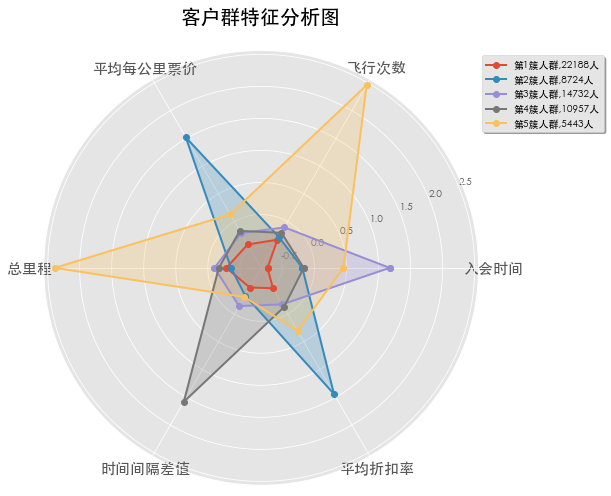

In [14]:
kmodel = KMeans(n_clusters=5, n_jobs=4)
kmodel.fit(filter_zscore_data)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心

# 所有簇中心坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
# print(max,min)
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(filter_zscore_data.columns) + [u'类别数目'] #重命名表头
# print(r) 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]
N =len(feature)
for i, v in enumerate(center_num):
    print(i,v,"#")
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))#-1：倒数第二个。把v拼接最后一个数
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()
